In [1]:
# Importation des libraires
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import seaborn as sns

# Couleurs
red, green, blue, yellow = '#FF0060', '#00DFA2', '#0079FF', '#F6FA70'

# 1. Distributions de probabilité

## 1.1. Distributions discrètes

### 1.1.1. Loi de Bernouilli

- Utilisée pour modéliser la probabilité de succès à une (seule) épreuve aléatoire donnant lieu à exactement 2 issues : l'échec et le succès (`0` et `1`)
- Possède un unique paramètre, la probabilité du succès notée $p$
- Moyenne : $p$ - Variance : $p(1 - p)$

In [2]:
# Générons 10 000 échantillons d'une loi de Bernouilli de paramètre p = 0.2
p, n_samples = .2, 10000
samples = np.random.binomial(1, p, n_samples)
samples[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

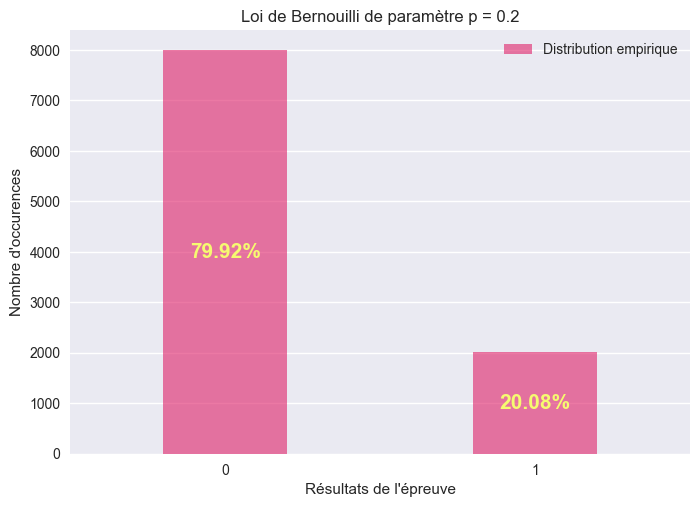

In [3]:
# Représentons graphiquement la distribution générée ci-dessus
sns.countplot(x=samples, color='#FF0060', alpha=.6, label='Distribution empirique', width=.4)

for bar in plt.gca().patches:
    plt.gca().annotate(f'{bar.get_height() / n_samples:.2%}',
                       (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                       ha='center', va='center', size=15, color='#F6FA70', fontweight=600)

plt.xlabel("Résultats de l'épreuve")
plt.ylabel("Nombre d'occurences")
plt.title(f'Loi de Bernouilli de paramètre p = {p}')
plt.legend()
plt.show()

### 1.1.2. Loi binomiale

- Définie comme étant la succession de $n$ épreuves indépendantes de Bernouilli ; l'on s'intéresse alors au nombre $k$ de succès à l'issue des $n$ épreuves
- Possède deux paramètres : le noombre d'épreuves $n$ et la probabilité du succès à chacune de ces $p$ épreuves
- Moyenne : $np$ - Variance : $np(1 - p)$

*Une loi binomiale de paramètres $(1, p)$ est équivalente à une loi de Bernouilli de paramètre $p$*

In [4]:
# 10 000 échantillons d'une loi binomiale de paramètres n = 10 et p = 0.7
n, p, n_samples = 10, .7, 10000
samples = np.random.binomial(n, p, n_samples)
samples[:10]

array([7, 8, 5, 7, 9, 8, 7, 6, 8, 8])

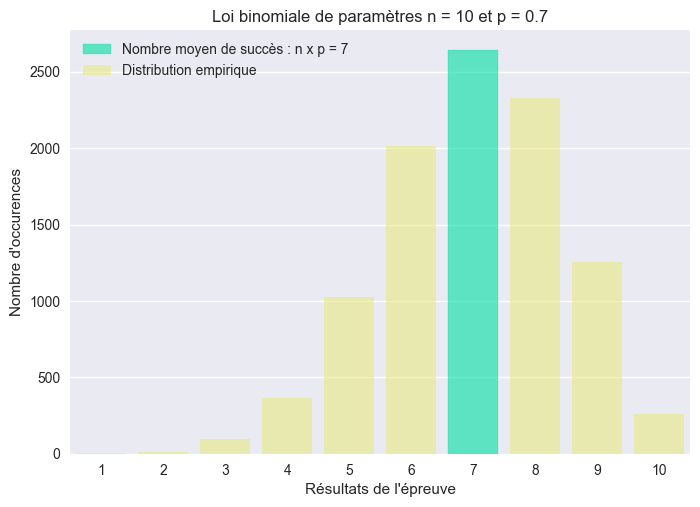

In [5]:
# Représentation graphique
sns.countplot(x=samples, color='#F6FA70', alpha=.6, label='Distribution empirique')

E = round(n*p) # espérance de la va / nombre moyen de succès
for i, label in enumerate(plt.gca().get_xticklabels()):
    n_success = int(label.get_text())
    if n_success == E:
        plt.gca().containers[0][i].set(color='#00DFA2', label=f'Nombre moyen de succès : n x p = {E}')

plt.xlabel("Résultats de l'épreuve")
plt.ylabel("Nombre d'occurences")
plt.title(f'Loi binomiale de paramètres n = {n} et p = {p}')
plt.legend(loc='upper left')
plt.show()

### 1.1.3. Loi multinomiale

- Généralisation de la loi binomiale : on passe de 2 issues possibles à $m \in \mathbb{N}$, et l'on s'intéresse au nombre d'apparition de chacun des résultats
- Elle est définie par $m + 1$ paramètres : le nombre d'épreuves $n$ et les probabilités $p_{i=1, ..., m}$ d'obtention de chaque résultat, avec bien évidemment $\sum_{i = 1}^m p_i = 1$

In [6]:
# 10 000 échantillons d'une loi binomiale de paramètres n = 10 et p = [0.1, 0.15, 0.3, .45]
n, p, n_samples = 10, [0.05, 0.2, 0.3, .45], 10000
samples = np.random.multinomial(n, p, n_samples)
samples[:5]

array([[0, 4, 2, 4],
       [1, 0, 5, 4],
       [0, 2, 2, 6],
       [0, 2, 5, 3],
       [0, 1, 2, 7]])

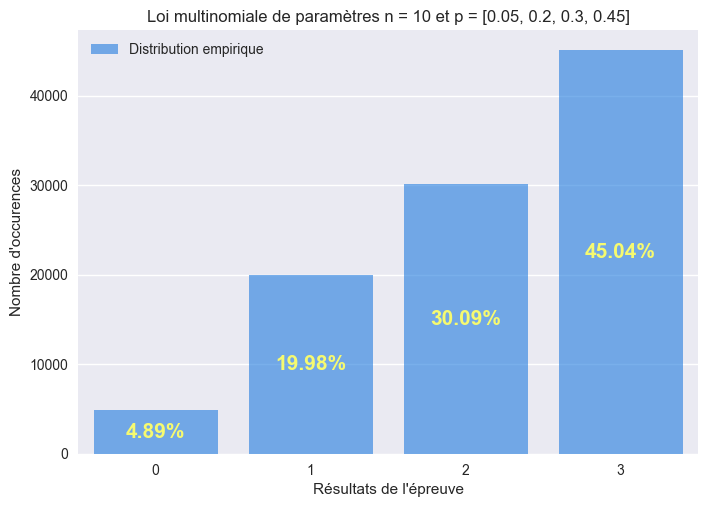

In [7]:
x = []
for sample in samples:
    for i, j in enumerate(sample):
        x.extend([i]*j)

sns.countplot(x=x, color='#0079FF', alpha=.6, label='Distribution empirique')

for bar in plt.gca().patches:
    plt.gca().annotate(f'{bar.get_height() / len(x):.2%}',
                       (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                       ha='center', va='center', size=15, color='#F6FA70', fontweight=600)
    
plt.xticks(range(len(samples[0])))
plt.xlabel("Résultats de l'épreuve")
plt.ylabel("Nombre d'occurences")
plt.title(f'Loi multinomiale de paramètres n = {n} et p = {p}')
plt.legend(loc='upper left')
plt.show()

### 1.1.4. Loi de Poisson

- Dite des évènements rares, elle modélise le nombre d'occurence d'évènements rares et indépendants dans un intervalle de temps donné
- Son paramètre $\lambda$ représente à la fois son espérance et sa variance

In [8]:
# 10 000 échantillons d'une loi de Poisson de paramètre λ = 3
l, n_samples = 3, 10000
samples = np.random.poisson(l, n_samples)
samples[:5]

array([4, 6, 4, 3, 0])

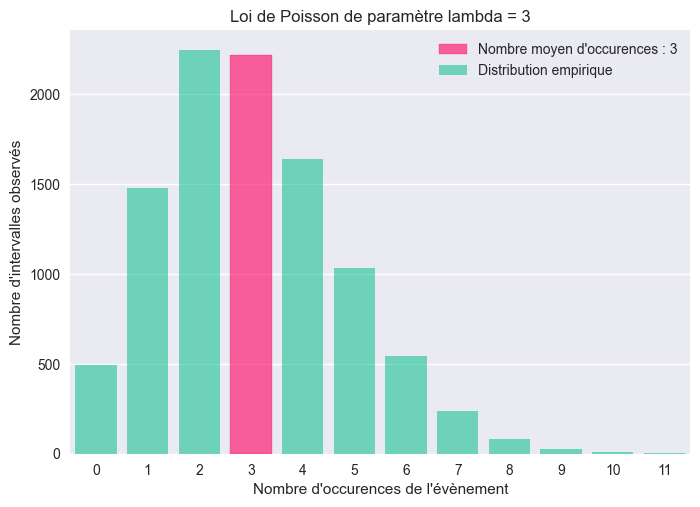

In [9]:
# Représentation graphique
sns.countplot(x=samples, color='#00DFA2', alpha=.6, label='Distribution empirique')

for i, label in enumerate(plt.gca().get_xticklabels()):
    n_success = int(label.get_text())
    if n_success == l:
        plt.gca().containers[0][i].set(color='#FF0060', label=f"Nombre moyen d'occurences : {l}")

plt.xlabel("Nombre d'occurences de l'évènement")
plt.ylabel("Nombre d'intervalles observés")
plt.title(f'Loi de Poisson de paramètre lambda = {l}')
plt.legend()
plt.show()

## 1.2. Distributions continues

In [10]:
from scipy.stats import uniform, norm, chi2, t, f, expon

In [11]:
def plot_distribution(distribution='normal', params=[None, None], n_samples=10000, bins=20, color='k'):
    """
    Cette fonction génère `n_samples` observations d'une loi `distribution` de paramètre(s) `params`,
    et affiche sur un même graphique :
    - L'histogramme des valeurs empiriques générées. Cet histogramme contient `bins` intervalles.
    - La fonction de densité théorique de la loi en question
    Le paramètre `color` permet de définir la couleur des graphes.
    """
    
    # Ensemble des lois considérées
    try:
        distributions = ['uniform', 'normal', 'chisquare', 'student', 'fisher', 'exponential']
        distribution = distribution.lower()
        assert distribution in distributions
    except AssertionError:
        print(f'`distribution` not in {distributions}.')
        return
    
    # L'argument `params` doit être une liste liste
    try:
        assert isinstance(params, list)
    except AssertionError:
        print(f'`params` should be a list.')
        return
    
    # Le nombre de paramètres doit être cohérent avec la loi choisie
    need_two_params = ['uniform', 'normal', 'fisher'] 
    if distribution in need_two_params: # distributions nécessitant 2 paramètres
        try:
            assert len(params) == 2
            assert params[0] is not None and params[1] is not None 
        except AssertionError:
            print(f'The {distribution} distribution needs 2 parameters.')
            return
        p1, p2 = params
    else: # les autres (1 seul paramètre requis)
        try:
            assert len(params) == 1
            assert params[0] is not None 
        except AssertionError:
            print(f'The {distribution} distribution needs 1 parameter')
            return
        p = params[0]
    
    # Génération des échantillons
    try:
        if distribution == 'uniform': samples = np.random.uniform(low=p1, high=p2, size=n_samples)
        if distribution == 'normal': samples = np.random.normal(loc=p1, scale=p2, size=n_samples)
        if distribution == 'chisquare': samples = np.random.chisquare(df=p, size=n_samples)
        if distribution == 'student': samples = np.random.standard_t(df=p, size=n_samples)
        if distribution == 'fisher': samples = np.random.f(dfnum=p1, dfden=p2, size=n_samples)
        if distribution == 'exponential': samples = np.random.exponential(scale=1/p, size=n_samples)
    except ValueError as e:
        print('Error in `params`,', e)
        return
    print('Some values :', samples[:5])
    min_val, max_val = samples.min(), samples.max()
    print(f'Min : {min_val:.4f} - Max : {max_val:.4f}')
    
    # Représentations graphiques
    ## Echantillon empirique
    plt.hist(samples, bins=bins, range=(min_val, max_val), density=True, color=color, alpha=.4)

    ## Distribution théorique
    x = np.linspace(min_val, max_val, 200)
    
    if distribution == 'uniform': y = uniform.pdf(x, loc=p1, scale=p2-p1)
    if distribution == 'normal': y = norm.pdf(x, loc=p1, scale=p2)
    if distribution == 'chisquare': y = chi2.pdf(x, df=p)
    if distribution == 'student': y = t.pdf(x, df=p)
    if distribution == 'fisher': y = f.pdf(x, dfn=p1, dfd=p2)
    if distribution == 'exponential': y = expon.pdf(x, scale=1/p)
    
    plt.plot(x, y, label='Distribution théorique', color=color)

    plt.xlabel('Valeur')
    plt.ylabel('Densité')
    plt.title(f'{distribution.title()} distribution, params: {params}')
    plt.legend()
    plt.tight_layout()
    plt.show()

### 1.2.1. Loi uniforme sur l'intervalle [a, b]

- Modélise une expérience à l'issue de laquelle chacune des valeurs de l'intervalle `[a, b]` a exactement la même probabilité d'être choisie
- Loi de référence : `a = 0` et `b = 1` ; $U_{[0, 1]}$
- Moyenne : `(a + b) / 2` (centre de l'intervalle) - Variance : `(b - a)^2 / 12`
- Utilisée pour l'initialisation des poids dans les réseaux de neurones, la recherche d'hyperparamètres optimaux, l'augmentation des données, etc.

*Une loi de probabilité discrète peut aussi être qualifiée d'uniforme. Dans ce cas, l'intervalle `[a, b]` est remplacé par un ensemble fini de cardinal `n`, chacun des éléments ayant la probabilité `1 / n` d'être tiré.*

Some values : [-0.99648184  0.68332782 -0.69814435  0.35026827  0.08496135]
Min : -0.9999 - Max : 0.9999


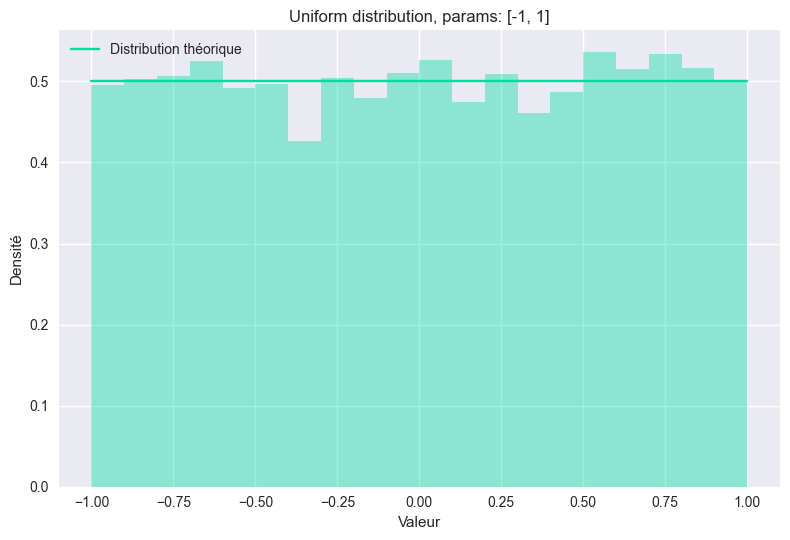

In [12]:
plot_distribution(distribution='uniform', params=[-1, 1], n_samples=10000, bins=20, color=green)

### 1.2.1. Loi normale (ou gaussienne)

- Symétrique par rapport à sa moyenne et en forme de cloche, son envergure dépend de son écatrt-type
- Définie par deux paramètres : sa moyenne $\mu$ et son écart-type $\sigma$
- Pour $\mu = 0$ et $\sigma = 1$, on parle de loi normale centrée réduite (loi standard) : $X \sim N(0, 1)$
- Utilisée pour modéliser la plupart des phénomènes naturels issus de plusieurs expériences aléatoires, pour initialiser les poids dans les réseaux de neurones, etc.

Some values : [0.20901102 2.35828418 2.46321134 1.63823229 3.04050209]
Min : -1.9896 - Max : 5.7135


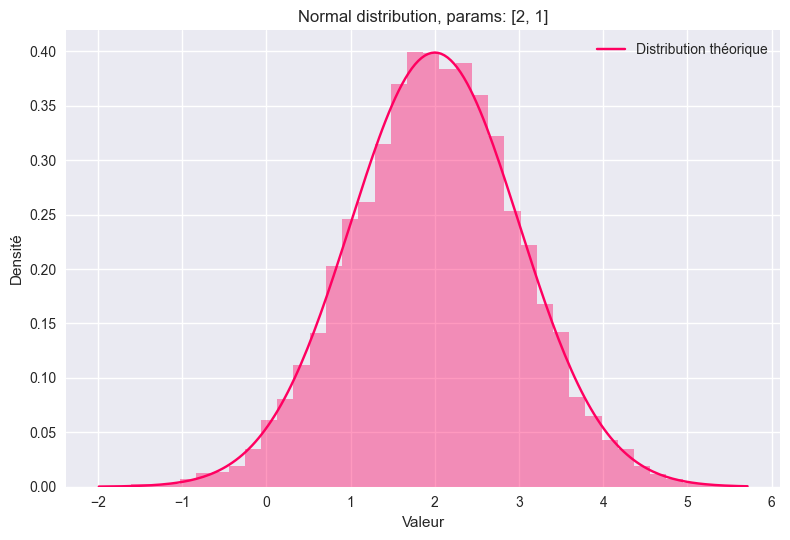

In [13]:
plot_distribution(distribution='normal', params=[2, 1], n_samples=10000, bins=40, color=red)

### 1.2.2. La loi du $\chi^2$

- Positive et asymétrique dans le sens positif
- Définie par un seul paramètre qu'est le dégré de liberté (ddl, degree of freedom, df) `k`
- Moyenne : `k` - Variance : `2k`
- Somme des carrés de `k` lois normales centrées réduites indépendantes : $Y = \sum_{i=1}^kX_i^2$
- Utilisée en inférence statistique (test d'indépendance de deux variables catégorielles, test d'adéquation à une loi, analyse de la variance (ANalysis Of VAriance, ANOVA))

Some values : [6.92272837 8.65483184 1.305167   3.96396578 3.00173904]
Min : 0.1855 - Max : 28.3147


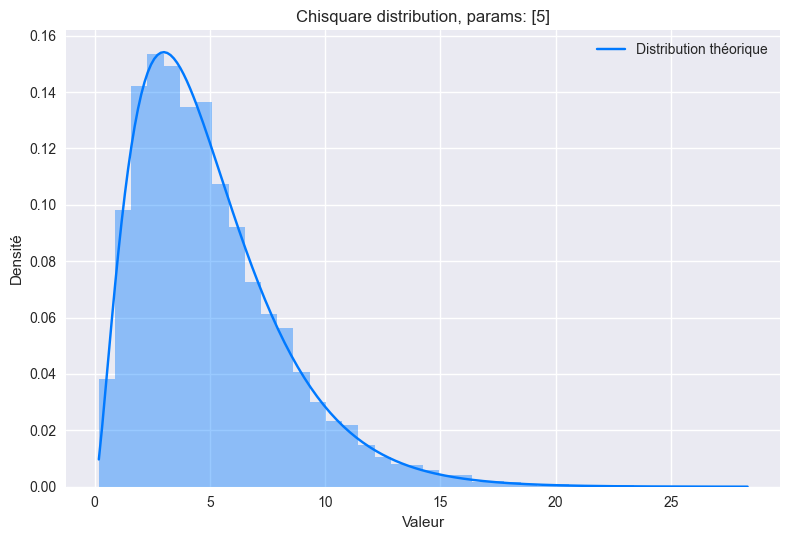

In [14]:
plot_distribution(distribution='chisquare', params=[5], n_samples=10000, bins=40, color=blue)

### 1.2.3. Loi de Student (ou t-distribution)

- Symétrique, similaire à la loi normale mais présentant des queues plus longues
- Un seul paramètre, le degré de liberté `k`
- Moyenne : 0 - Variance : `k / (k - 2)`
- Rapport d'une normale centrée réduite par la racine carrée d'un chi-deux à `k` degrés de libertés divisé par `k` : $Z = \frac{X}{\sqrt{Y / k}}$
- Utilisée pour construire des intervalles de confiance de moyennes, et tester si les moyennes de 2 populations sont significativement différentes

Some values : [-1.27327921  0.95086422 -0.13397514 -0.74128496 -0.69672761]
Min : -6.1370 - Max : 8.8971


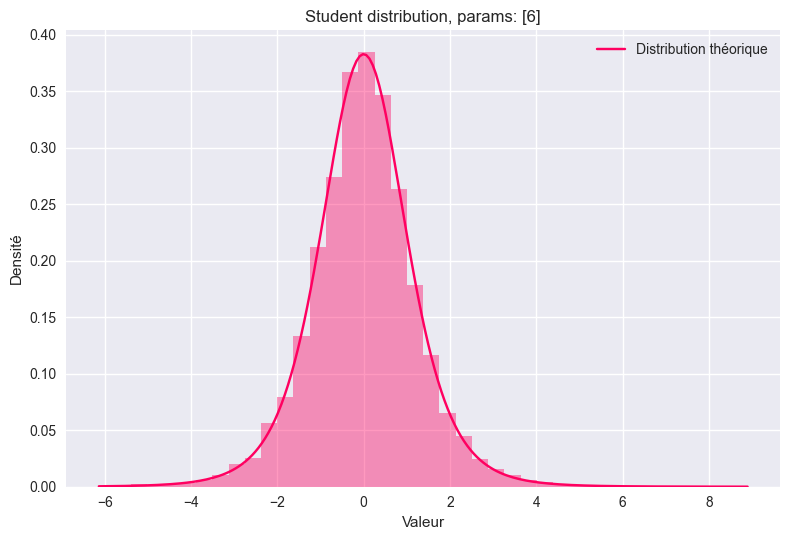

In [15]:
plot_distribution(distribution='student', params=[6], n_samples=10000, bins=40, color=red)

### 1.2.4. Loi de Fisher (f-distribution)

- Disymétrique
- Deux paramètres (degrés de libertés) `m` et `n`
- Moyenne : `n / (n - 2)` - Variance : un peu compliqué
- Rapport d'un $\chi^2$ $Y_1$ divisé par son ddl `m` par un $\chi^2$ $Y_2$ divisé par son ddl `n` : $F = \frac{Y_1  / m}{Y_2 / n}$
- Utilisée pour construire des intervalles de confiance de variances, tester si les variances de 2 populations sont significativement différentes, en ANOVA, etc.

Some values : [0.47298959 0.66880655 0.90702878 5.14759996 0.55324327]
Min : 0.0290 - Max : 26.7188


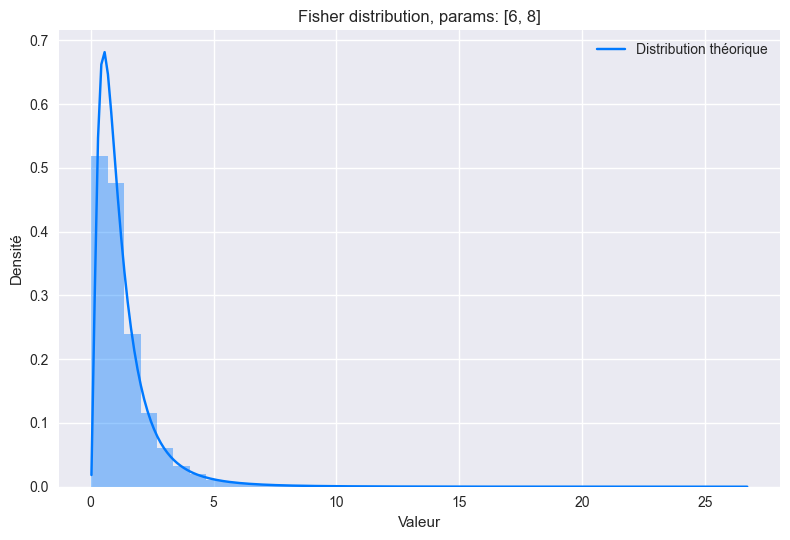

In [16]:
plot_distribution(distribution='fisher', params=[6, 8], n_samples=10000, bins=40, color=blue)

### 1.1.5. Loi exponetielle

- Très proche de la loi de Poisson (discrète), elle modélise l'écart de temps entre deux évènements dans un processus de Poisson
- Ne possède que le taux moyen d'évènements $\lambda$ pour paramètre
- Moyenne : $\frac{1}{\lambda}$ - Variance : $\frac{1}{\lambda^2}$

Some values : [0.06879432 0.08297743 0.77066875 0.23118978 0.72195703]
Min : 0.0000 - Max : 7.2457


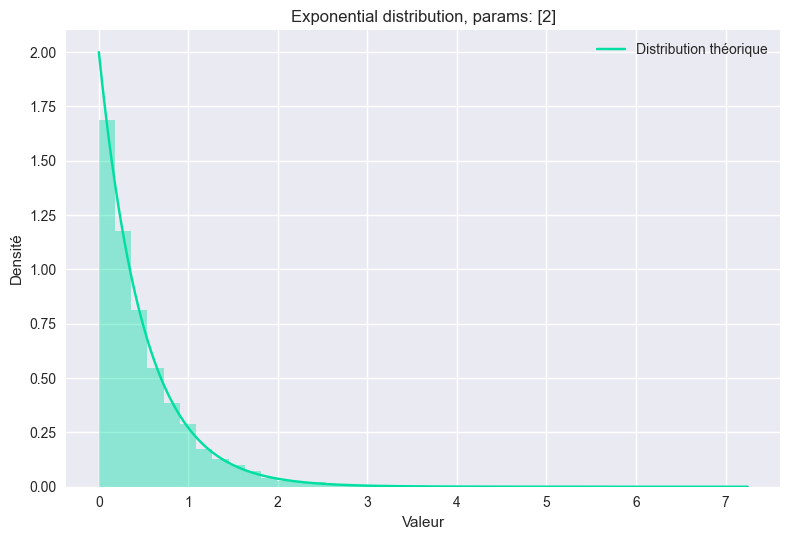

In [17]:
plot_distribution(distribution='exponential', params=[2], n_samples=10000, bins=40, color=green)